# Assignment for Data Visualization:

   Unnamed: 0 Country/Region  Confirmed Deaths  Recovered  Active  New cases  \
0           0    Afghanistan      36263   1269      25198    9796      106.0   
1           1        Albania       4880    144       2745    1991      117.0   
2           2        Algeria      27973   1163      18837    7973      616.0   
3           3        Andorra        907     52        803      52       10.0   
4           4         Angola        950     41        242     667       18.0   

   New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0        10.0             18                3.50                  69.49   
1         6.0             63                2.95                  56.25   
2         8.0            749                4.16                  67.34   
3         0.0              0                5.73                  88.53   
4         1.0              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0  

C:\Users\Zubair\AppData\Local\Temp\ipykernel_10004\2056772002.py:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Deaths'].fillna(df['Deaths'].mean(), inplace=True)


index
2                 Algeria
4                  Angola
6               Argentina
9                 Austria
10             Azerbaijan
              ...        
173                    US
175               Ukraine
179            Uzbekistan
182    West Bank and Gaza
185                Zambia
Name: Country/Region, Length: 78, dtype: object
      Country/Region  Death_Rate
index                           
0        Afghanistan    3.499435
1            Albania    2.950820
2            Algeria    4.157581
3            Andorra    5.733186
4             Angola    4.315789


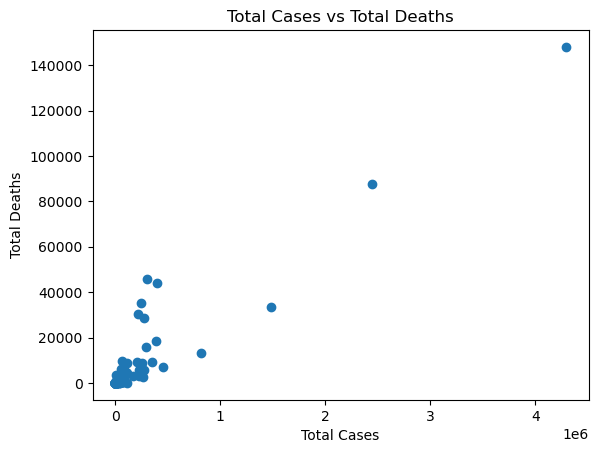

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and Display Data
df = pd.read_csv('covid_19.csv')
print(df.head())

# Step 2: Set the Dataset Index to `Unnamed: 0` (if it exists)
if 'Unnamed: 0' in df.columns:
    df.set_index('Unnamed: 0', inplace=True)
    df.index.name = 'index'
else:
    print("Column 'Unnamed: 0' not found in the dataset.")

# Step 3: Replace Whitespace in Column Names with Underscore
def replace_whitespace_with_underscore(df):
    df.columns = df.columns.str.replace(' ', '_')
    return df

df = replace_whitespace_with_underscore(df)

# Step 4: Check Basic Information
print("Column Names:", df.columns)
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())

# Step 5: Fill NaN Values with the Mean of the Column (only numeric columns)
numeric_columns = df.select_dtypes(include=[np.number]).columns
if len(numeric_columns) > 0:
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
else:
    print("No numeric columns found to fill NaN values.")

# Step 6: Count the Number of Unique Countries
if 'Country/Region' in df.columns:
    unique_countries = df['Country/Region'].nunique()
    print(f"Number of unique countries: {unique_countries}")
else:
    print("Column 'Country/Region' not found.")

# Step 7: Check for Duplicate Country Entries
if 'Country/Region' in df.columns:
    duplicates = df.duplicated(subset=['Country/Region']).sum()
    print(f"Number of duplicate country entries: {duplicates}")

    # Remove duplicates if needed
    df.drop_duplicates(subset=['Country/Region'], inplace=True)
else:
    print("Column 'Country/Region' not found.")

# Step 8: Find Mean, Median, and Standard Deviation of Total Cases
if 'Total_Cases' in df.columns and pd.api.types.is_numeric_dtype(df['Total_Cases']):
    mean_total_cases = df['Total_Cases'].mean()
    median_total_cases = df['Total_Cases'].median()
    std_total_cases = df['Total_Cases'].std()
    print(f"Mean: {mean_total_cases}, Median: {median_total_cases}, Std: {std_total_cases}")
else:
    print("Column 'Total_Cases' not found or is not numeric.")

# Step 9: Replace Strings in Deaths Column with Mean
if 'Deaths' in df.columns:
    df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')  # Convert to numeric, coercing errors to NaN
    df['Deaths'].fillna(df['Deaths'].mean(), inplace=True)
else:
    print("Column 'Deaths' not found.")

# Step 10: Change the Datatype of Deaths Column to Float
if 'Deaths' in df.columns:
    df['Deaths'] = df['Deaths'].astype(float)
else:
    print("Column 'Deaths' not found.")

# Step 11: Calculate Total Deaths and Recoveries Worldwide
if 'Deaths' in df.columns and 'Recovered' in df.columns:
    total_deaths = df['Deaths'].sum()
    total_recoveries = df['Recovered'].sum()
    print(f"Total Deaths: {total_deaths}, Total Recoveries: {total_recoveries}")
else:
    print("Columns 'Deaths' or 'Recovered' not found.")

# Step 12: Countries with More Than 1 Million Total Cases
if 'Total_Cases' in df.columns:
    countries_1m_cases = df[df['Total_Cases'] > 1000000]['Country/Region']
    print(countries_1m_cases)
else:
    print("Column 'Total_Cases' not found.")

# Step 13: Countries with Recovery Rate Above 95%
if 'Recovered' in df.columns and 'Total_Cases' in df.columns:
    df['Recovery_Rate'] = np.where(
        df['Total_Cases'] != 0,
        (df['Recovered'] / df['Total_Cases']) * 100,
        np.nan  # Set to NaN if Total_Cases is 0
    )
    high_recovery_countries = df[df['Recovery_Rate'] > 95]['Country/Region']
    print(high_recovery_countries)
else:
    print("Columns 'Recovered' or 'Total_Cases' not found.")

# Step 14: Drop Columns `WHO Region` and `Confirmed`
columns_to_drop = ['WHO_Region', 'Confirmed']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=columns_to_drop, inplace=True)

# Step 15: Find the Country with the Max Deaths
if 'Deaths' in df.columns and df['Deaths'].notna().any():
    max_deaths_country = df.loc[df['Deaths'].idxmax(), 'Country/Region']
    print(f"Country with max deaths: {max_deaths_country}")
else:
    print("Column 'Deaths' not found or contains no valid values.")

# Step 16: Sort Countries by Deaths (Descending Order)
if 'Deaths' in df.columns:
    df_sorted = df.sort_values(by='Deaths', ascending=False)
else:
    print("Column 'Deaths' not found.")

# Step 17: Create a New Column `Total_Cases`
required_columns = ['Deaths', 'Recovered', 'Active']
if all(col in df.columns for col in required_columns):
    df['Total_Cases'] = df['Deaths'] + df['Recovered'] + df['Active']
else:
    print(f"Missing one or more required columns: {required_columns}")

# Step 18: Calculate Death Rate for Each Country
if 'Deaths' in df.columns and 'Total_Cases' in df.columns:
    df['Death_Rate'] = np.where(
        df['Total_Cases'] != 0,
        (df['Deaths'] / df['Total_Cases']) * 100,
        np.nan  # Set to NaN if Total_Cases is 0
    )
else:
    print("Columns 'Deaths' or 'Total_Cases' not found.")

# Step 19: Identify Countries with Increasing Cases but Low Death Rates
if 'Total_Cases' in df.columns and 'Death_Rate' in df.columns:
    low_death_rate_countries = df[(df['Total_Cases'].diff() > 0) & (df['Death_Rate'] < 5)]['Country/Region']
    print(low_death_rate_countries)
else:
    print("Columns 'Total_Cases' or 'Death_Rate' not found.")

# Step 20: Print Head of 2 Columns
if 'Country/Region' in df.columns and 'Death_Rate' in df.columns:
    print(df[['Country/Region', 'Death_Rate']].head())
else:
    print("Columns 'Country/Region' or 'Death_Rate' not found.")

# Step 21: Create a Scatter Plot
if 'Total_Cases' in df.columns and 'Deaths' in df.columns:
    plt.scatter(df['Total_Cases'], df['Deaths'])
    plt.xlabel('Total Cases')
    plt.ylabel('Total Deaths')
    plt.title('Total Cases vs Total Deaths')
    plt.show()
else:
    print("Columns 'Total_Cases' or 'Deaths' not found.")

# Step 22: Save Dataset in CSV Format
df.to_csv('updated_dataset.csv', index=False)